In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("../../datasets/toxic_comments_1.csv",nrows=6000)

In [3]:
dataset = dataset[["comment_text","toxic"]]

In [4]:
#cleaning the text
dataset.columns = ["comment","toxic"]
dataset["comment"] = dataset["comment"].str.replace("\n"," ")

In [5]:
bag_of_words = []
import re
for i in range(0,6000):
    words = re.sub('[^a-zA-Z]',' ',dataset["comment"][i])
    words = words.lower().split()
    words = [word for word in words if not word in set(stopwords.words("english"))]
    sentence = ' '.join(words)
    bag_of_words.append(sentence)

In [6]:
bag_of_words[0]

'explanation edits made username hardcore metallica fan reverted vandalisms closure gas voted new york dolls fac please remove template talk page since retired'

In [7]:
dataset["toxic"].value_counts()

0    5395
1     605
Name: toxic, dtype: int64

In [8]:
cv = CountVectorizer(max_features=1500)

X = cv.fit_transform(bag_of_words).toarray()
y = dataset["toxic"].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 2)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
classifier = DecisionTreeClassifier()

In [11]:
classifier.fit(X_train,y_train)


DecisionTreeClassifier()

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[970,  82],
       [ 58,  90]], dtype=int64)

In [14]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)

In [15]:
#accuracy
accuracies.mean()

0.8904166666666666

In [16]:
from sklearn.metrics import precision_score,f1_score,recall_score

In [17]:
pre = precision_score(y_test,y_pred)
pre

0.5232558139534884

In [18]:
rec = recall_score(y_test,y_pred)
rec

0.6081081081081081

In [19]:
f1 = f1_score(y_test,y_pred)
f1

0.5625

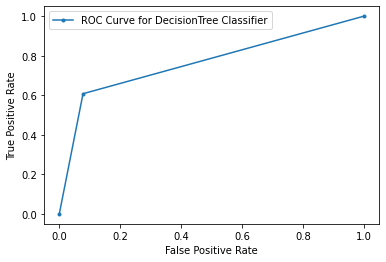

In [41]:
import numpy as np
from sklearn.metrics import roc_curve
fp,tp,treshold = roc_curve(y_test,y_pred)
plt.plot(fp,tp,marker = '.',label='ROC Curve for DecisionTree Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[970,  82],
       [ 58,  90]], dtype=int64)

In [44]:
tn, fp, fn, tp = cm.ravel()

In [45]:
print("True positive rate")
tp/(tp + fn)

True positive rate


0.6081081081081081

In [46]:
print("False positive rate")
fp/(tn + fp)

False positive rate


0.0779467680608365

In [47]:
from sklearn.metrics import roc_auc_score
area = roc_auc_score(y_test,y_pred)

In [48]:
area

0.7650806700236358